In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import *

In [ ]:
credit_card = pd.read_csv('https://raw.githubusercontent.com/Andikazidanef15/Introduction-to-Tensor-Flow-in-Python/main/uci_credit_card.csv')
housing = pd.read_csv('https://raw.githubusercontent.com/Andikazidanef15/Introduction-to-Tensor-Flow-in-Python/main/kc_house_data.csv')
slmnist = pd.read_csv('https://raw.githubusercontent.com/Andikazidanef15/Introduction-to-Tensor-Flow-in-Python/main/slmnist.csv')

# Introduction to TensorFlow


## Defining data as constants

In [ ]:
credit_card

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
credit_numpy = np.array(credit_card[['EDUCATION','MARRIAGE','AGE','BILL_AMT1']])

In [ ]:
from tensorflow import constant

# Convert the credit_numpy array into a tensorflow constant
credit_constant = constant(credit_numpy)

# Print constant datatype
print('\n The datatype is:', credit_constant.dtype)

# Print constant shape
print('\n The shape is:', credit_constant.shape)


 The datatype is: tf.float64

 The shape is: TensorShape([30000, 4])


## Defining variables

In [ ]:
from tensorflow import Variable

# Define the 1-dimensional variable A1
A1 = Variable([1, 2, 3, 4])

# Print the variable A1
print('\n A1: ', A1)

# Convert A1 to a numpy array and assign it to B1
B1 = A1.numpy()

# Print B1
print('\n B1: ', B1)


 A1:  [1 2 3 4]

 B1:  array([1, 2, 3, 4], dtype=int32)


## Performing element-wise multiplication

In [ ]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

# Perform element-wise multiplication
C1 = multiply(A1,B1)
C23 = multiply(A23,B23)

# Print the tensors C1 and C23
print('\n C1: {}'.format(C1.numpy()))
print('\n C23: {}'.format(C23.numpy()))


 C1: [1 2 3 4]

 C23: [[1 2 3]
 [1 6 4]]


Notice how performing element-wise multiplication with tensors of ones leaves the original tensors unchanged.

## Making predictions with matrix multiplication

This process will yield a vector of parameters that can be multiplied by the input data to generate predictions. In this exercise, you will use input data, features, and a target vector, bill, which are taken from a credit card dataset we will use later in the course.

The matrix of input data, features, contains two columns: education level and age. The target vector, bill, is the size of the credit card borrower's bill.

Since we have not trained the model, you will enter a guess for the values of the parameter vector, params. You will then use matmul() to perform matrix multiplication of features by params to generate predictions, billpred, which you will compare with bill. Note that we have imported matmul() and constant().


In [ ]:
# Define features, params, and bill as constants
features = constant([[2, 24], [2, 26], [2, 57], [1, 37]])
params = constant([[1000], [150]])
bill = constant([[3913], [2682], [8617], [64400]])

# Compute billpred using features and params
billpred = matmul(features, params)

# Compute and print the error
error = bill - billpred
print(error.numpy())

array([[-1687],
       [-3218],
       [-1933],
       [57850]], dtype=int32)


## Optimizing with gradients
You are given a loss function, , which you want to minimize. You can do this by computing the slope using the GradientTape() operation at different values of x. If the slope is positive, you can decrease the loss by lowering x. If it is negative, you can decrease it by increasing x. This is how gradient descent works.

In [ ]:
def compute_gradient(x0):
  	# Define x as a variable with an initial value of x0
	x = Variable(x0)
	with GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
		y = multiply(x,x)
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

-2.0
2.0
0.0


Notice that the slope is positive at x = 1, which means that we can lower the loss by reducing x. The slope is negative at x = -1, which means that we can lower the loss by increasing x. The slope at x = 0 is 0, which means that we cannot lower the loss by either increasing or decreasing x. This is because the loss is minimized at x = 0.

# Linear Models

## Load data using pandas

In [ ]:
data_path = 'https://raw.githubusercontent.com/Andikazidanef15/Introduction-to-Tensor-Flow-in-Python/main/kc_house_data.csv'

# Load the dataset as a dataframe named housing
housing = pd.read_csv(data_path)

# Print the price column of housing
print(housing['price'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [ ]:
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Setting the data type
In this exercise, you will both load data and set its type. Note that housing is available and pandas has been imported as pd. You will import numpy and tensorflow, and define tensors that are usable in tensorflow using columns in housing with a given data type. Recall that you can select the price column, for instance, from housing using housing['price'].

In [ ]:
# Import numpy and tensorflow with their standard aliases
import numpy as np
import tensorflow as tf

# Use a numpy array to define price as a 32-bit float
price = np.array(housing['price'], np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing['waterfront'], tf.bool)

# Print price and waterfront
print(price)
waterfront

array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
      dtype=float32)


<tf.Tensor: shape=(21613,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

## Modifying the loss function
In this exercise, you will compute the loss within another function called loss_function(), which first generates predicted values from the data and variables. The purpose of this is to construct a function of the trainable model variables that returns the loss. You can then repeatedly evaluate this function for different variable values until you find the minimum. In practice, you will pass this function to an optimizer in tensorflow. Note that features and targets have been defined and are available. Additionally, Variable, float32, and keras are available.

In [ ]:
features = constant([1., 2., 3., 4., 5.])
targets = constant([ 2.,  4.,  6.,  8., 10.])

In [ ]:
# Initialize a variable named scalar
scalar = Variable(1.0, float32)

# Define the model
def model(scalar, features = features):
  	return scalar * features

# Define a loss function
def loss_function(scalar, features = features, targets = targets):
	# Compute the predicted values
	predictions = model(scalar, features)
    
	# Return the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())

3.0


## Set up a linear regression
A univariate linear regression identifies the relationship between a single feature and the target tensor. In this exercise, we will use a property's lot size and price. Just as we discussed in the video, we will take the natural logarithms of both tensors, which are available as price_log and size_log.

In this exercise, you will define the model and the loss function. You will then evaluate the loss function for two different values of intercept and slope. Remember that the predicted values are given by intercept + features*slope. Additionally, note that keras.losses.mse() is available for you. Furthermore, slope and intercept have been defined as variables.

In [ ]:
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
size = np.array(housing['sqft_lot'], np.float32)

price_log = tf.math.log(price)
size_log = tf.math.log(size)


In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope*features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets, predictions)

# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.44653
71.866


## Train a linear model

In [ ]:
def plot_results(intercept, slope, features, targets):
  plt.scatter(features, targets, color = 'black')
  plt.plot(features, intercept + features*slope)
  plt.xlabel('log(size)')
  plt.ylabel('log(price)')
  plt.show()


In [ ]:
# Define the intercept and slope
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

50.2487
3.1135912
4.9227514
4.154534
2.3645823
1.3899004
1.424176
1.331604
1.2648494
1.2258576


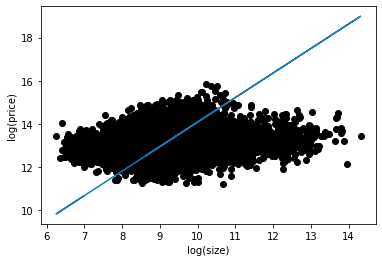

In [ ]:
# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope, size_log, price_log)

## Multiple linear regression
In most cases, performing a univariate linear regression will not yield a model that is useful for making accurate predictions. In this exercise, you will perform a multiple regression, which uses more than one feature.

In [ ]:
bedrooms = np.array(housing['bedrooms'], np.int64)

In [ ]:
def print_results(param):
  dic = {'loss':loss_function(param), 'intercept':param[0], 'slope_1':param[1], 'slope_2':param[2]}
  print(dic)

In [ ]:
params = Variable([0.1, 0.05, 0.02])

# Define the linear regression model
def linear_regression(params, feature1 = size_log, feature2 = bedrooms):
	return params[0] + feature1*params[1] + feature2*params[2]

# Define the loss function
def loss_function(params, targets = price_log, feature1 = size_log, feature2 = bedrooms):
	# Set the predicted values
	predictions = linear_regression(params, feature1, feature2)
  
	# Use the mean absolute error loss
	return keras.losses.mae(targets, predictions)

# Define the optimize operation
opt = keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(10):
	opt.minimize(lambda: loss_function(params), var_list=[params])
	print_results(params)

{'intercept': 0.100999996, 'loss': 12.4175406, 'slope_1': 0.051, 'slope_2': 0.0209999979}
{'intercept': 0.101999991, 'loss': 12.4041805, 'slope_1': 0.0519999973, 'slope_2': 0.0219999943}
{'intercept': 0.102999993, 'loss': 12.3908195, 'slope_1': 0.053, 'slope_2': 0.0229999963}
{'intercept': 0.103999987, 'loss': 12.3774576, 'slope_1': 0.0539999977, 'slope_2': 0.0239999928}
{'intercept': 0.104999982, 'loss': 12.3640976, 'slope_1': 0.054999996, 'slope_2': 0.0249999892}
{'intercept': 0.105999984, 'loss': 12.3507376, 'slope_1': 0.055999998, 'slope_2': 0.0259999912}
{'intercept': 0.106999978, 'loss': 12.3373766, 'slope_1': 0.0569999963, 'slope_2': 0.0269999895}
{'intercept': 0.107999973, 'loss': 12.3240166, 'slope_1': 0.0579999946, 'slope_2': 0.0279999878}
{'intercept': 0.108999968, 'loss': 12.3106546, 'slope_1': 0.0589999929, 'slope_2': 0.0289999861}
{'intercept': 0.10999997, 'loss': 12.2972946, 'slope_1': 0.0599999912, 'slope_2': 0.0299999863}


## Preparing to batch train
Before we can train a linear model in batches, we must first define variables, a loss function, and an optimization operation. In this exercise, we will prepare to train a model that will predict price_batch, a batch of house prices, using size_batch, a batch of lot sizes in square feet. In contrast to the previous lesson, we will do this by loading batches of data using pandas, converting it to numpy arrays, and then using it to minimize the loss function in steps.

In [ ]:
# Define the intercept and slope
intercept = Variable(10, float32)
slope = Variable(0.5, float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + slope*features

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

In [ ]:
# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv(data_path, chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.int32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

InvalidArgumentError: ignored

# Neural Networks

## The linear algebra of dense layers
There are two ways to define a dense layer in tensorflow. The first involves the use of low-level, linear algebraic operations. The second makes use of high-level keras operations. In this exercise, we will use the first method to construct the network shown in the image below.

The input layer contains 3 features -- education, marital status, and age -- which are available as borrower_features. The hidden layer contains 2 nodes and the output layer contains a single node.

For each layer, you will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function. Note that Variable(), ones(), matmul(), and keras() have been imported from tensorflow.

In [ ]:
borrower_features = [[ 2.,  2., 43.]]

# Initialize bias1
bias1 = Variable(1.0)

# Initialize weights1 as 3x2 variable of ones
weights1 = Variable(ones((3, 2)))

# Perform matrix multiplication of borrower_features and weights1
product1 = matmul(borrower_features,weights1)

# Apply sigmoid activation function to product1 + bias1
dense1 = keras.activations.sigmoid(product1 + bias1)

# Print shape of dense1
print("\n dense1's output shape: {}".format(dense1.shape))



# From previous step
bias1 = Variable(1.0)
weights1 = Variable(ones((3, 2)))
product1 = matmul(borrower_features, weights1)
dense1 = keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = matmul(dense1,weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 dense1's output shape: (1, 2)

 prediction: 0.9525741338729858

 actual: 1


Our model produces predicted values in the interval between 0 and 1. For the example we considered, the actual value was 1 and the predicted value was a probability between 0 and 1. This, of course, is not meaningful, since we have not yet trained our model's parameters.

## The low-level approach with multiple example
In this exercise, we'll build further intuition for the low-level approach by constructing the first dense hidden layer for the case where we have multiple examples. We'll assume the model is trained and the first layer weights, weights1, and bias, bias1, are available. We'll then perform matrix multiplication of the borrower_features tensor by the weights1 variable. Recall that the borrower_features tensor includes education, marital status, and age. Finally, we'll apply the sigmoid function to the elements of products1 + bias1, yielding dense1.

In [ ]:
borrower_features = tf.cast([[ 3.,  3., 23.],
       [ 2.,  1., 24.],
       [ 1.,  1., 49.],
       [ 1.,  1., 49.],
       [ 2.,  1., 29.]], np.float32)
weights1 = tf.cast([[-0.6 ,  0.6 ],
       [ 0.8 , -0.3 ],
       [-0.09, -0.08]],np.float32)

# Compute the product of borrower_features and weights1
products1 = matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  TensorShape([5, 3])

 shape of weights1:  TensorShape([3, 2])

 shape of bias1:  TensorShape([])

 shape of dense1:  TensorShape([5, 2])


Note that our input data, borrower_features, is 5x3 because it consists of 5 examples for 3 features. The shape of weights1 is 3x2, as it was in the previous exercise, since it does not depend on the number of examples. Additionally, bias1 is a scalar. Finally, dense1 is 5x2, which means that we can multiply it by the following set of weights, weights2, which we defined to be 2x1 in the previous exercise.

## Using the dense layer operation
We've now seen how to define dense layers in tensorflow using linear algebra. In this exercise, we'll skip the linear algebra and let keras work out the details. This will allow us to construct the network below, which has 2 hidden layers and 10 features, using less code than we needed for the network with 1 hidden layer and 3 features.

In [ ]:
borrower_features = tf.cast([[6.96469188e-01, 2.86139339e-01, 2.26851448e-01, 5.51314771e-01,
        7.19468951e-01, 4.23106462e-01, 9.80764210e-01, 6.84829712e-01,
        4.80931908e-01, 3.92117530e-01],
       [3.43178004e-01, 7.29049683e-01, 4.38572258e-01, 5.96778952e-02,
        3.98044258e-01, 7.37995386e-01, 1.82491735e-01, 1.75451756e-01,
        5.31551361e-01, 5.31827569e-01],
       [6.34400964e-01, 8.49431813e-01, 7.24455297e-01, 6.11023486e-01,
        7.22443402e-01, 3.22958916e-01, 3.61788660e-01, 2.28263229e-01,
        2.93714046e-01, 6.30976140e-01],
       [9.21049416e-02, 4.33701187e-01, 4.30862755e-01, 4.93685097e-01,
        4.25830305e-01, 3.12261224e-01, 4.26351309e-01, 8.93389165e-01,
        9.44160044e-01, 5.01836658e-01],
       [6.23952925e-01, 1.15618393e-01, 3.17285478e-01, 4.14826214e-01,
        8.66309166e-01, 2.50455379e-01, 4.83034253e-01, 9.85559762e-01,
        5.19485116e-01, 6.12894535e-01],
       [1.20628662e-01, 8.26340795e-01, 6.03060126e-01, 5.45068026e-01,
        3.42763841e-01, 3.04120779e-01, 4.17022198e-01, 6.81300759e-01,
        8.75456870e-01, 5.10422349e-01],
       [6.69313788e-01, 5.85936546e-01, 6.24903500e-01, 6.74689054e-01,
        8.42342436e-01, 8.31949860e-02, 7.63682842e-01, 2.43666381e-01,
        1.94222957e-01, 5.72456956e-01],
       [9.57125202e-02, 8.85326803e-01, 6.27248943e-01, 7.23416328e-01,
        1.61292069e-02, 5.94431877e-01, 5.56785166e-01, 1.58959642e-01,
        1.53070509e-01, 6.95529521e-01],
       [3.18766415e-01, 6.91970289e-01, 5.54383278e-01, 3.88950586e-01,
        9.25132513e-01, 8.41669977e-01, 3.57397556e-01, 4.35914621e-02,
        3.04768085e-01, 3.98185670e-01],
       [7.04958856e-01, 9.95358467e-01, 3.55914861e-01, 7.62547791e-01,
        5.93176901e-01, 6.91701770e-01, 1.51127458e-01, 3.98876280e-01,
        2.40855902e-01, 3.43456000e-01],
       [5.13128161e-01, 6.66624546e-01, 1.05908483e-01, 1.30894944e-01,
        3.21980596e-01, 6.61564350e-01, 8.46506238e-01, 5.53257346e-01,
        8.54452491e-01, 3.84837806e-01],
       [3.16787899e-01, 3.54264677e-01, 1.71081826e-01, 8.29112649e-01,
        3.38670850e-01, 5.52370071e-01, 5.78551471e-01, 5.21533072e-01,
        2.68806447e-03, 9.88345444e-01],
       [9.05341566e-01, 2.07635865e-01, 2.92489409e-01, 5.20010173e-01,
        9.01911378e-01, 9.83630896e-01, 2.57542074e-01, 5.64359069e-01,
        8.06968689e-01, 3.94370049e-01],
       [7.31073022e-01, 1.61069021e-01, 6.00698590e-01, 8.65864456e-01,
        9.83521581e-01, 7.93657899e-02, 4.28347290e-01, 2.04542860e-01,
        4.50636476e-01, 5.47763586e-01],
       [9.33267102e-02, 2.96860784e-01, 9.27584231e-01, 5.69003761e-01,
        4.57412004e-01, 7.53525972e-01, 7.41862178e-01, 4.85790335e-02,
        7.08697379e-01, 8.39243352e-01],
       [1.65937886e-01, 7.80997932e-01, 2.86536604e-01, 3.06469738e-01,
        6.65261447e-01, 1.11392170e-01, 6.64872468e-01, 8.87856781e-01,
        6.96311295e-01, 4.40327883e-01],
       [4.38214391e-01, 7.65096068e-01, 5.65641999e-01, 8.49041641e-02,
        5.82671106e-01, 8.14843714e-01, 3.37066382e-01, 9.27576602e-01,
        7.50716984e-01, 5.74063838e-01],
       [7.51644015e-01, 7.91489631e-02, 8.59389067e-01, 8.21504116e-01,
        9.09871638e-01, 1.28631204e-01, 8.17800835e-02, 1.38415575e-01,
        3.99378717e-01, 4.24306870e-01],
       [5.62218368e-01, 1.22243546e-01, 2.01399505e-01, 8.11644375e-01,
        4.67987567e-01, 8.07938218e-01, 7.42637832e-03, 5.51592708e-01,
        9.31932151e-01, 5.82175434e-01],
       [2.06095725e-01, 7.17757583e-01, 3.78985852e-01, 6.68383956e-01,
        2.93197222e-02, 6.35900378e-01, 3.21979336e-02, 7.44780660e-01,
        4.72912997e-01, 1.21754356e-01],
       [5.42635918e-01, 6.67744428e-02, 6.53364897e-01, 9.96086299e-01,
        7.69397318e-01, 5.73774099e-01, 1.02635257e-01, 6.99834049e-01,
        6.61167860e-01, 4.90971319e-02],
       [7.92299330e-01, 5.18716574e-01, 4.25867707e-01, 7.88187146e-01,
        4.11569238e-01, 4.81026262e-01, 1.81628838e-01, 3.21318895e-01,
        8.45533013e-01, 1.86903745e-01],
       [4.17291075e-01, 9.89034534e-01, 2.36599818e-01, 9.16832328e-01,
        9.18397486e-01, 9.12963450e-02, 4.63652730e-01, 5.02216339e-01,
        3.13668936e-01, 4.73395362e-02],
       [2.41685644e-01, 9.55296382e-02, 2.38249913e-01, 8.07791114e-01,
        8.94978285e-01, 4.32228930e-02, 3.01946849e-01, 9.80582178e-01,
        5.39504826e-01, 6.26309335e-01],
       [5.54540846e-03, 4.84909445e-01, 9.88328516e-01, 3.75185519e-01,
        9.70381573e-02, 4.61908758e-01, 9.63004470e-01, 3.41830611e-01,
        7.98922718e-01, 7.98846304e-01],
       [2.08248302e-01, 4.43367690e-01, 7.15601265e-01, 4.10519779e-01,
        1.91006958e-01, 9.67494309e-01, 6.50750339e-01, 8.65459859e-01,
        2.52423584e-02, 2.66905814e-01],
       [5.02071083e-01, 6.74486384e-02, 9.93033290e-01, 2.36462399e-01,
        3.74292195e-01, 2.14011908e-01, 1.05445869e-01, 2.32479781e-01,
        3.00610125e-01, 6.34442270e-01],
       [2.81234771e-01, 3.62276763e-01, 5.94284385e-03, 3.65719140e-01,
        5.33885956e-01, 1.62015840e-01, 5.97433090e-01, 2.93152481e-01,
        6.32050514e-01, 2.61966046e-02],
       [8.87593448e-01, 1.61186308e-02, 1.26958027e-01, 7.77162433e-01,
        4.58952338e-02, 7.10998714e-01, 9.71046150e-01, 8.71682942e-01,
        7.10161626e-01, 9.58509743e-01],
       [4.29813325e-01, 8.72878909e-01, 3.55957657e-01, 9.29763675e-01,
        1.48777649e-01, 9.40029025e-01, 8.32716227e-01, 8.46054852e-01,
        1.23923011e-01, 5.96486926e-01],
       [1.63924806e-02, 7.21184373e-01, 7.73751410e-03, 8.48222747e-02,
        2.25498408e-01, 8.75124514e-01, 3.63576323e-01, 5.39959908e-01,
        5.68103194e-01, 2.25463361e-01],
       [5.72146773e-01, 6.60951793e-01, 2.98245400e-01, 4.18626845e-01,
        4.53088939e-01, 9.32350636e-01, 5.87493777e-01, 9.48252380e-01,
        5.56034744e-01, 5.00561416e-01],
       [3.53221106e-03, 4.80889052e-01, 9.27455008e-01, 1.98365688e-01,
        5.20911328e-02, 4.06778902e-01, 3.72396469e-01, 8.57153058e-01,
        2.66111158e-02, 9.20149207e-01],
       [6.80903018e-01, 9.04226005e-01, 6.07529044e-01, 8.11953306e-01,
        3.35543871e-01, 3.49566221e-01, 3.89874220e-01, 7.54797101e-01,
        3.69291186e-01, 2.42219806e-01],
       [9.37668383e-01, 9.08011079e-01, 3.48797321e-01, 6.34638071e-01,
        2.73842216e-01, 2.06115127e-01, 3.36339533e-01, 3.27099890e-01,
        8.82276118e-01, 8.22303832e-01],
       [7.09623218e-01, 9.59345222e-01, 4.22543347e-01, 2.45033041e-01,
        1.17398441e-01, 3.01053345e-01, 1.45263731e-01, 9.21861008e-02,
        6.02932215e-01, 3.64187449e-01],
       [5.64570367e-01, 1.91335723e-01, 6.76905870e-01, 2.15505451e-01,
        2.78023601e-01, 7.41760433e-01, 5.59737921e-01, 3.34836423e-01,
        5.42988777e-01, 6.93984687e-01],
       [9.12132144e-01, 5.80713212e-01, 2.32686386e-01, 7.46697605e-01,
        7.77769029e-01, 2.00401321e-01, 8.20574224e-01, 4.64934856e-01,
        7.79766679e-01, 2.37478226e-01],
       [3.32580268e-01, 9.53697145e-01, 6.57815099e-01, 7.72877812e-01,
        6.88374341e-01, 2.04304114e-01, 4.70688760e-01, 8.08963895e-01,
        6.75035119e-01, 6.02788571e-03],
       [8.74077454e-02, 3.46794724e-01, 9.44365561e-01, 4.91190493e-01,
        2.70176262e-01, 3.60423714e-01, 2.10652635e-01, 4.21200067e-01,
        2.18035445e-01, 8.45752478e-01],
       [4.56270605e-01, 2.79802024e-01, 9.32891667e-01, 3.14351350e-01,
        9.09714639e-01, 4.34180908e-02, 7.07115054e-01, 4.83889043e-01,
        4.44221050e-01, 3.63233462e-02],
       [4.06831913e-02, 3.32753628e-01, 9.47119534e-01, 6.17659986e-01,
        3.68874848e-01, 6.11977041e-01, 2.06131533e-01, 1.65066436e-01,
        3.61817271e-01, 8.63353372e-01],
       [5.09401739e-01, 2.96901524e-01, 9.50251639e-01, 8.15966070e-01,
        3.22973937e-01, 9.72098231e-01, 9.87351120e-01, 4.08660144e-01,
        6.55923128e-01, 4.05653208e-01],
       [2.57348120e-01, 8.26526731e-02, 2.63610333e-01, 2.71479845e-01,
        3.98639083e-01, 1.84886038e-01, 9.53818381e-01, 1.02879882e-01,
        6.25208557e-01, 4.41697389e-01],
       [4.23518062e-01, 3.71991783e-01, 8.68314683e-01, 2.80476987e-01,
        2.05761567e-02, 9.18097019e-01, 8.64480257e-01, 2.76901782e-01,
        5.23487568e-01, 1.09088197e-01],
       [9.34270695e-02, 8.37466121e-01, 4.10265714e-01, 6.61716521e-01,
        9.43200588e-01, 2.45130599e-01, 1.31598311e-02, 2.41484065e-02,
        7.09385693e-01, 9.24551904e-01],
       [4.67330277e-01, 3.75109136e-01, 5.42860448e-01, 8.58916819e-01,
        6.52153850e-01, 2.32979894e-01, 7.74580181e-01, 1.34613499e-01,
        1.65559977e-01, 6.12682283e-01],
       [2.38783404e-01, 7.04778552e-01, 3.49518538e-01, 2.77423948e-01,
        9.98918414e-01, 4.06161249e-02, 6.45822525e-01, 3.86995859e-02,
        7.60210276e-01, 2.30089962e-01],
       [8.98318663e-02, 6.48449719e-01, 7.32601225e-01, 6.78095341e-01,
        5.19009456e-02, 2.94306934e-01, 4.51088339e-01, 2.87103295e-01,
        8.10513437e-01, 1.31115109e-01],
       [6.12179339e-01, 9.88214970e-01, 9.02556539e-01, 2.22157061e-01,
        8.18876142e-05, 9.80597317e-01, 8.82712960e-01, 9.19472456e-01,
        4.15503561e-01, 7.44615436e-01],
       [2.12831497e-01, 3.92304063e-01, 8.51548076e-01, 1.27612218e-01,
        8.93865347e-01, 4.96507972e-01, 4.26095665e-01, 3.05646390e-01,
        9.16848779e-01, 5.17623484e-01],
       [8.04026365e-01, 8.57651770e-01, 9.22382355e-01, 3.03380728e-01,
        3.39810848e-01, 5.95073879e-01, 4.41324145e-01, 9.32842553e-01,
        3.97564054e-01, 4.77778047e-01],
       [6.17186069e-01, 4.04739499e-01, 9.92478430e-01, 9.88512859e-02,
        2.20603317e-01, 3.22655141e-01, 1.47722840e-01, 2.84219235e-01,
        7.79245317e-01, 5.22891998e-01],
       [3.39536369e-02, 9.82622564e-01, 6.16006494e-01, 5.89394793e-02,
        6.61168754e-01, 3.78369361e-01, 1.35673299e-01, 5.63664615e-01,
        7.27079928e-01, 6.71126604e-01],
       [2.47513160e-01, 5.24866223e-01, 5.37663460e-01, 7.16803372e-01,
        3.59867334e-01, 7.97732592e-01, 6.27921820e-01, 3.83316055e-02,
        5.46479046e-01, 8.61912072e-01],
       [5.67574143e-01, 1.75828263e-01, 5.10376394e-01, 7.56945848e-01,
        1.10105194e-01, 8.17099094e-01, 1.67481646e-01, 5.34076512e-01,
        3.85743469e-01, 2.48623773e-01],
       [6.47432506e-01, 3.73921096e-02, 7.60045826e-01, 5.26940644e-01,
        8.75771224e-01, 5.20718336e-01, 3.50331701e-02, 1.43600971e-01,
        7.95604587e-01, 4.91976053e-01],
       [4.41879272e-01, 3.18434775e-01, 2.84549206e-01, 9.65886295e-01,
        4.32969332e-01, 8.84003043e-01, 6.48163140e-01, 8.58427644e-01,
        8.52449536e-01, 9.56312001e-01],
       [6.97942257e-01, 8.05396914e-01, 7.33127892e-01, 6.05226815e-01,
        7.17354119e-01, 7.15750396e-01, 4.09077927e-02, 5.16110837e-01,
        7.92651355e-01, 2.42962182e-01],
       [4.65147972e-01, 4.34985697e-01, 4.02787179e-01, 1.21839531e-01,
        5.25711536e-01, 4.46248353e-01, 6.63392782e-01, 5.49413085e-01,
        2.75429301e-02, 3.19179893e-02],
       [7.01359808e-01, 7.07581103e-01, 9.59939122e-01, 8.76704693e-01,
        4.68059659e-01, 6.25906527e-01, 4.57181722e-01, 2.22946241e-01,
        3.76677006e-01, 1.03884235e-01],
       [6.66527092e-01, 1.92030147e-01, 4.75467801e-01, 9.67436612e-01,
        3.16689312e-02, 1.51729956e-01, 2.98579186e-01, 9.41806972e-01,
        9.08841789e-01, 1.62000835e-01],
       [9.81117785e-01, 7.50747502e-01, 5.39977074e-01, 9.31702912e-01,
        8.80607128e-01, 3.91316503e-01, 6.56343222e-01, 6.47385120e-01,
        3.26968193e-01, 1.79390177e-01],
       [4.66809869e-01, 2.63281047e-01, 3.55065137e-01, 9.54143941e-01,
        4.61137861e-01, 6.84891462e-01, 3.36229891e-01, 9.95861053e-01,
        6.58767581e-01, 1.96009472e-01],
       [9.81839970e-02, 9.43180561e-01, 9.44777846e-01, 6.21328354e-01,
        1.69914998e-02, 2.25534886e-01, 8.01276803e-01, 8.75459850e-01,
        4.53989804e-01, 3.65520626e-01],
       [2.74224997e-01, 1.16970517e-01, 1.15744539e-01, 9.52602684e-01,
        8.08626115e-01, 1.64779365e-01, 2.07050055e-01, 6.55551553e-01,
        7.64664233e-01, 8.10314834e-01],
       [1.63337693e-01, 9.84128296e-01, 2.27802068e-01, 5.89415431e-01,
        5.87615728e-01, 9.67361867e-01, 6.57667458e-01, 5.84904253e-01,
        5.18772602e-01, 7.64657557e-01],
       [1.06055260e-01, 2.09190114e-03, 9.52488840e-01, 4.98657674e-01,
        3.28335375e-01, 3.68053257e-01, 8.03843319e-01, 3.82370204e-01,
        7.70169199e-01, 4.40461993e-01],
       [8.44077468e-01, 7.62040615e-02, 4.81128335e-01, 4.66849715e-01,
        2.64327973e-01, 9.43614721e-01, 9.05028462e-01, 4.43596303e-01,
        9.71596092e-02, 2.06783146e-01],
       [2.71491826e-01, 4.84219760e-01, 3.38377118e-01, 7.74136066e-01,
        4.76026595e-01, 8.70370507e-01, 9.95781779e-01, 2.19835952e-01,
        6.11671388e-01, 8.47502291e-01],
       [9.45236623e-01, 2.90086418e-01, 7.27042735e-01, 1.50161488e-02,
        8.79142463e-01, 6.39385507e-02, 7.33395398e-01, 9.94610369e-01,
        5.01189768e-01, 2.09333986e-01],
       [5.94643593e-01, 6.24149978e-01, 6.68072760e-01, 1.72611743e-01,
        8.98712695e-01, 6.20991349e-01, 4.35687043e-02, 6.84041083e-01,
        1.96084052e-01, 2.73407809e-02],
       [5.50953269e-01, 8.13313663e-01, 8.59941125e-01, 1.03520922e-01,
        6.63042784e-01, 7.10075200e-01, 2.94516981e-01, 9.71364021e-01,
        2.78687477e-01, 6.99821860e-02],
       [5.19280374e-01, 6.94314897e-01, 2.44659781e-01, 3.38582188e-01,
        5.63627958e-01, 8.86678159e-01, 7.47325897e-01, 2.09591955e-01,
        2.51777083e-01, 5.23880661e-01],
       [7.68958688e-01, 6.18761778e-01, 5.01324296e-01, 5.97125351e-01,
        7.56060004e-01, 5.37079811e-01, 8.97752762e-01, 9.47067499e-01,
        9.15354490e-01, 7.54518330e-01],
       [2.46321008e-01, 3.85271460e-01, 2.79999942e-01, 6.57660246e-01,
        3.24221611e-01, 7.54391611e-01, 1.13509081e-01, 7.75364757e-01,
        5.85901976e-01, 8.35388660e-01],
       [4.30875659e-01, 6.24964476e-01, 5.54412127e-01, 9.75671291e-01,
        7.55474389e-01, 5.44813275e-01, 1.74032092e-01, 9.04114246e-01,
        2.05837786e-01, 6.50043249e-01],
       [9.36471879e-01, 2.23579630e-01, 2.25923538e-01, 8.51818919e-01,
        8.27655017e-01, 3.51703346e-01, 2.65096277e-01, 1.27388477e-01,
        9.87936080e-01, 8.35343122e-01],
       [8.99391592e-01, 5.13679326e-01, 1.14384830e-01, 5.25803380e-02,
        3.30582112e-01, 9.20330405e-01, 9.47581828e-01, 8.41163874e-01,
        1.58679143e-01, 4.19923156e-01],
       [2.46242926e-01, 2.05349773e-01, 6.84825838e-01, 4.86111671e-01,
        3.24909657e-01, 1.00214459e-01, 5.44763386e-01, 3.47025156e-01,
        3.91095817e-01, 3.10508728e-01],
       [3.87195200e-01, 5.55859566e-01, 1.41438060e-02, 8.47647011e-01,
        9.21919882e-01, 5.50529718e-01, 2.68021107e-01, 9.90239024e-01,
        3.83194029e-01, 6.93655372e-01],
       [6.89952552e-01, 4.34309065e-01, 1.99158162e-01, 9.66579378e-01,
        6.36908561e-02, 4.85149384e-01, 2.20730707e-01, 2.93974131e-01,
        8.28527331e-01, 3.67265552e-01],
       [8.33482668e-02, 1.96309000e-01, 8.60373437e-01, 9.77028847e-01,
        2.67982155e-01, 6.75408959e-01, 8.11989978e-02, 7.23465621e-01,
        4.16436613e-01, 9.18159902e-01],
       [3.11536163e-01, 9.41466987e-01, 5.03247440e-01, 3.48892927e-01,
        6.47019625e-01, 2.49746203e-01, 2.29763597e-01, 1.96346447e-01,
        9.59899545e-01, 4.92913723e-01],
       [7.51614988e-01, 4.73991871e-01, 5.87540150e-01, 5.84138989e-01,
        9.79886293e-01, 6.68433130e-01, 2.39769474e-01, 1.51976589e-02,
        2.18682140e-01, 4.55519646e-01],
       [3.93420339e-01, 8.12326252e-01, 7.85556734e-01, 8.90959650e-02,
        9.52010751e-01, 5.27456701e-01, 5.96403956e-01, 4.05056775e-01,
        6.49500966e-01, 8.71326327e-01],
       [6.73935950e-01, 9.70098555e-01, 7.01122224e-01, 8.21720719e-01,
        4.50395830e-02, 6.72698498e-01, 6.54752672e-01, 1.01746053e-01,
        8.42387497e-01, 6.14172399e-01],
       [9.83280912e-02, 5.94467103e-01, 4.78415847e-01, 2.33293563e-01,
        1.97560899e-02, 3.65567267e-01, 6.19851053e-01, 3.29279125e-01,
        3.07254642e-01, 7.51121223e-01],
       [7.58624673e-01, 7.18765855e-01, 1.01181954e-01, 5.16165972e-01,
        5.57798684e-01, 7.44804502e-01, 9.03177738e-01, 3.69038880e-01,
        4.28663462e-01, 7.32767463e-01],
       [6.62636399e-01, 5.57869911e-01, 3.50139618e-01, 1.95352346e-01,
        1.83807373e-01, 8.15832913e-02, 8.12008530e-02, 8.45798194e-01,
        3.83672744e-01, 6.07396215e-02],
       [8.96425664e-01, 2.23270476e-01, 2.68124431e-01, 1.94497839e-01,
        9.67501044e-01, 1.12540089e-01, 7.22163260e-01, 9.32088733e-01,
        6.68001294e-01, 8.58726621e-01],
       [2.42447108e-01, 6.73927963e-01, 7.00871348e-01, 4.58332509e-01,
        8.70545626e-01, 6.94386125e-01, 8.94877791e-01, 7.53204346e-01,
        5.20290434e-01, 4.98688221e-01],
       [4.53727633e-01, 2.16468628e-02, 5.35141408e-01, 4.22973245e-01,
        1.57533601e-01, 1.19069695e-01, 4.49351877e-01, 3.99130546e-02,
        9.86579895e-01, 3.78120929e-01],
       [3.82109195e-01, 5.11263013e-02, 4.26672339e-01, 1.57454368e-02,
        3.00936326e-02, 3.39099228e-01, 8.20968926e-01, 4.58821088e-01,
        1.48405796e-02, 1.63220033e-01],
       [7.39922702e-01, 7.38293707e-01, 7.54522920e-01, 3.51669371e-01,
        3.52276951e-01, 8.02075684e-01, 3.98137897e-01, 7.27191031e-01,
        5.81122994e-01, 3.64341676e-01],
       [8.00065175e-02, 1.16125375e-01, 8.89558733e-01, 4.52340513e-01,
        9.94004548e-01, 3.63896936e-01, 2.49954298e-01, 3.50539327e-01,
        3.43086094e-01, 6.37356758e-01],
       [1.27375638e-02, 7.63268650e-01, 4.16414618e-01, 4.32239205e-01,
        4.81115013e-01, 4.49212462e-01, 4.97470886e-01, 3.45904320e-01,
        4.53346133e-01, 4.04651344e-01],
       [5.18242717e-01, 6.23269081e-01, 2.41040602e-01, 5.08437157e-01,
        5.94621897e-01, 1.69483144e-02, 5.20493746e-01, 2.39293247e-01,
        4.04538542e-01, 8.26530159e-01],
       [3.26235592e-01, 4.83216912e-01, 2.47411542e-02, 3.08750868e-01,
        6.39721096e-01, 3.15161765e-01, 2.05797508e-01, 2.90655673e-01,
        9.54378307e-01, 8.68018195e-02],
       [4.63357776e-01, 5.83869033e-02, 5.38658261e-01, 1.46035731e-01,
        6.34084821e-01, 2.64397472e-01, 6.90915406e-01, 3.47146064e-01,
        4.16848855e-03, 2.94894695e-01]],np.float32)

In [ ]:
# Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  TensorShape([100, 7])

 shape of dense2:  TensorShape([100, 3])

 shape of predictions:  TensorShape([100, 1])


With just 8 lines of code, you were able to define 2 dense hidden layers and an output layer. This is the advantage of using high-level operations in tensorflow. Note that each layer has 100 rows because the input data contains 100 examples.

## Binary Classification Problem

In [ ]:
credit_card

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
default = tf.cast(credit_card['default.payment.next.month'],int32)
bill_amounts = tf.cast(credit_card[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3','BILL_AMT2','BILL_AMT1']],float32)

# Construct input layer from features
inputs = constant(bill_amounts, float32)

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

[[1 1 0 0 0]
 [0 0 -1 -1 -1]
 [1 1 0 0 0]
 [0 0 -1 -1 -1]
 [0 0 -1 -1 -1]]


If you run the code several times, you'll notice that the errors change each time. This is because you're using an untrained model with randomly initialized parameters. Furthermore, the errors fall on the interval between -1 and 1 because default is a binary variable that takes on values of 0 and 1 and outputs is a probability between 0 and 1.

In [ ]:
# Construct input layer from borrower features
inputs = constant(borrower_features,float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6,activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

array([[0.03558748, 0.09780829, 0.03445338, 0.5013167 , 0.2683619 ,
        0.06247229],
       [0.04333224, 0.11216097, 0.04004329, 0.48199517, 0.25440624,
        0.06806216],
       [0.03847786, 0.10541128, 0.03384403, 0.51441914, 0.24807556,
        0.05977214],
       [0.04131056, 0.10708534, 0.040503  , 0.47482824, 0.26750076,
        0.06877214],
       [0.03621254, 0.09985607, 0.03627057, 0.49359602, 0.26955548,
        0.06450941]], dtype=float32)


Notice that each row of outputs sums to one. This is because a row contains the predicted class probabilities for one example. As with the previous exercise, our predictions are not yet informative, since we are using an untrained model with randomly initialized parameters. This is why the model tends to assign similar probabilities to each class.

## The Dangers of Local Minima
In this exercise, you will try to find the global minimum of loss_function() using keras.optimizers.SGD(). You will do this twice, each time with a different initial value of the input to loss_function(). First, you will use x_1, which is a variable with an initial value of 6.0. Second, you will use x_2, which is a variable with an initial value of 0.3. Note that loss_function() has been defined and is available.

In [ ]:
# Define the model function
def model(bias, weights, features = borrower_features):
  product = tf.matmul(features, weights)
  return tf.keras.activations.sigmoid(product+bias)

# Compute the predicted values and loss
def loss_function(bias, weights, targets = default, features = borrower_features):
  predictions = model(bias, weights)
  return tf.keras.losses.binary_crossentropy(targets, predictions)


## Initialization in TensorFlow

In [ ]:
# Define the layer 1 weights
w1 = Variable(random.normal([10, 23]))

# Initialize the layer 1 bias
b1 = Variable(ones([23,100]))

# Define the layer 2 weights
w2 = Variable(random.normal([7,1]))

# Define the layer 2 bias
b2 = Variable([0])

## Defining the Model and Loss Functions

In [ ]:
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

## Training neural networks with TensorFlow

In [ ]:
test_features = tf.cast(credit_card.iloc[:,:-1],float32)
test_targets = tf.cast(credit_card.iloc[:,-1],int32)

In [ ]:
# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

InvalidArgumentError: ignored

# High Level APIs

## The sequential model in Keras
In chapter 3, we used components of the keras API in tensorflow to define a neural network, but we stopped short of using its full capabilities to streamline model definition and training. In this exercise, you will use the keras sequential model API to define a neural network that can be used to classify images of sign language letters. You will also use the .summary() method to print the model's architecture, including the shape and number of parameters associated with each layer.

Note that the images were reshaped from (28, 28) to (784,), so that they could be used as inputs to a dense layer. Additionally, note that keras has been imported from tensorflow for you.

In [ ]:
# Define a Keras sequential model
model = keras.Sequential()

# Define the first dense layer
model.add(keras.layers.Dense(16, activation='relu', input_shape=(784,)))

# Define the second dense layer
model.add(keras.layers.Dense(8, activation='relu'))

# Define the output layer
model.add(keras.layers.Dense(4, activation='softmax'))

# Print the model architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
Total params: 12,732
Trainable params: 12,732
Non-trainable params: 0
_________________________________________________________________
None


Notice that we've defined a model, but we haven't compiled it. The compilation step in keras allows us to set the optimizer, loss function, and other useful training parameters in a single line of code. Furthermore, the .summary() method allows us to view the model's architecture.

## Compiling a sequential model
In this exercise, you will work towards classifying letters from the Sign Language MNIST dataset; however, you will adopt a different network architecture than what you used in the previous exercise. There will be fewer layers, but more nodes. You will also apply dropout to prevent overfitting. Finally, you will compile the model to use the adam optimizer and the categorical_crossentropy loss. You will also use a method in keras to summarize your model's architecture. Note that keras has been imported from tensorflow for you and a sequential keras model has been defined as model.

In [ ]:
# Define the first dense layer
model.add(keras.layers.Dense(16, activation = 'sigmoid', input_shape = (784,)))

# Apply dropout to the first layer's output
model.add(keras.layers.Dropout(0.25))

# Define the output layer
model.add(keras.layers.Dense(4, activation = 'softmax'))

# Compile the model
model.compile('adam', loss='categorical_crossentropy')

# Print a model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 68        
Total params: 12,880
Trainable params: 12,880
Non-trainable params: 0
____________________________________________________

Notice that printing the .summary() method shows the layer type, output shape, and number of parameters of each layer.

## Defining a multiple input model
In some cases, the sequential API will not be sufficiently flexible to accommodate your desired model architecture and you will need to use the functional API instead. If, for instance, you want to train two models with different architectures jointly, you will need to use the functional API to do this. In this exercise, we will see how to do this. We will also use the .summary() method to examine the joint model's architecture.

Note that keras has been imported from tensorflow for you. Additionally, the input layers of the first and second models have been defined as m1_inputs and m2_inputs, respectively. Note that the two models have the same architecture, but one of them uses a sigmoid activation in the first layer and the other uses a relu.



In [ ]:
m1_inputs = tf.keras.Input(shape=(784,))
m2_inputs = tf.keras.Input(shape=(784,))

# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 12)           9420        input_1[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 12)           9420        input_2[0][0]                    
______________________________________________________________________________________________

Notice that the .summary() method yields a new column: connected to. This column tells you how layers connect to each other within the network. We can see that dense_2, for instance, is connected to the input_2 layer. We can also see that the add layer, which merged the two models, connected to both dense_1 and dense_3.

## Training with Keras
In this exercise, we return to our sign language letter classification problem. We have 2000 images of four letters--A, B, C, and D--and we want to classify them with a high level of accuracy. We will complete all parts of the problem, including the model definition, compilation, and training.

Note that keras has been imported from tensorflow for you. Additionally, the features are available as sign_language_features and the targets are available as sign_language_labels.

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 10s 7ms/step - loss: 0.5942 - sparse_categorical_accuracy: 0.8386 - val_loss: 0.1876 - val_sparse_categorical_accuracy: 0.9477
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1701 - sparse_categorical_accuracy: 0.9511 - val_loss: 0.1376 - val_sparse_categorical_accuracy: 0.9596
Epoch 3/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1203 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.1120 - val_sparse_categorical_accuracy: 0.9662
Epoch 4/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9728 - val_loss: 0.0969 - val_sparse_categorical_accuracy: 0.9700
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.0905 - val_sparse_categorical_accuracy: 0.9711
Epoch 6/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0606 - sparse_categorical_acc

With the keras API, you only needed 14 lines of code to define, compile, train, and validate a model. You may have noticed that your model performed quite well. In just 10 epochs, we achieved a classification accuracy of over 90% in the validation sample!

## Preparing to train with Estimators
For this exercise, we'll return to the King County housing transaction dataset from chapter 2. We will again develop and train a machine learning model to predict house prices; however, this time, we'll do it using the estimator API.

Rather than completing everything in one step, we'll break this procedure down into parts. We'll begin by defining the feature columns and loading the data. In the next exercise, we'll define and train a premade estimator. Note that feature_column has been imported for you from tensorflow. Additionally, numpy has been imported as np, and the Kings County housing dataset is available as a pandas DataFrame: housing.

In [ ]:
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Define feature columns for bedrooms and bathrooms
bedrooms = feature_column.numeric_column("bedrooms")
bathrooms = feature_column.numeric_column('bathrooms')

# Define the list of feature columns
feature_list = [bedrooms, bathrooms]

def input_fn():
	# Define the labels
	labels = np.array(housing['price'])
	# Define the features
	features = {'bedrooms':np.array(housing['bedrooms']), 
                'bathrooms':np.array(housing['bathrooms'])}
	return features, labels

In [ ]:
# Define the model and set the number of steps
model = estimator.DNNRegressor(feature_columns=feature_list, hidden_units=[2,2])
model.train(input_fn, steps=1)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp906hi14z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp906hi14z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp906hi14z/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp906hi14z/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 426471650000.0, step = 0


INFO:tensorflow:loss = 426471650000.0, step = 0


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1...


INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp906hi14z/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp906hi14z/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1...


INFO:tensorflow:Loss for final step: 426471650000.0.


INFO:tensorflow:Loss for final step: 426471650000.0.


In [ ]:
# Define the model and set the number of steps
model = estimator.LinearRegressor(feature_columns=feature_list)
model.train(input_fn, steps=2)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8ppwt3v5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8ppwt3v5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8ppwt3v5/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8ppwt3v5/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...


INFO:tensorflow:loss = 426471400000.0, step = 0


INFO:tensorflow:loss = 426471400000.0, step = 0


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2...


INFO:tensorflow:Saving checkpoints for 2 into /tmp/tmp8ppwt3v5/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2 into /tmp/tmp8ppwt3v5/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2...


INFO:tensorflow:Loss for final step: 426469850000.0.


INFO:tensorflow:Loss for final step: 426469850000.0.
